데이터 증강

# 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 로딩한 데이터에서 증강

cifar10 데이터

## 데이터 준비

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

train_x = raw_train_x/255
test_x = raw_test_x/255

train_y = raw_train_y
test_y = raw_test_y

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


### 데이터 살펴보기

9 truck


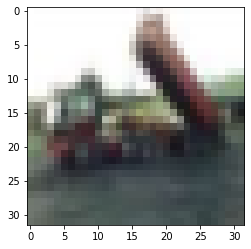

4 deer


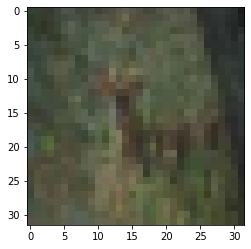

7 horse


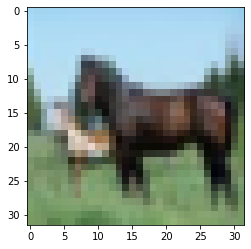

9 truck


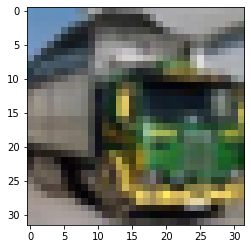

In [3]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

## 데이터 증강

In [4]:
datagen = ImageDataGenerator(
    rotation_range = 10, # 0~180 회전하는 범위
    width_shift_range = 0.3, #좌우로 이동하는 범위
    height_shift_range = 0.3, #위아래로 이동하는 범위
    fill_mode='nearest', #이미지를 회전, 이동하거나 축소할 때 생기는 공간을 채우는 방식
    horizontal_flip=True, #좌우로 반전 시킬 것이냐
    vertical_flip=False #상하로 반전 시킬 것이냐
)

로딩한 데이터에서 증강 : **flow** 사용

In [5]:
BATCH_SIZE = 128
iterator = datagen.flow(train_x, train_y, batch_size=BATCH_SIZE)

In [6]:
#next를 호출하여 다음 아이템 받기
item = next(iterator)
augmented_x, augmented_y = item
print(augmented_x.shape, augmented_y.shape)

(128, 32, 32, 3) (128, 1)


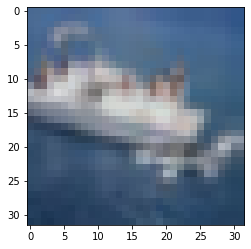

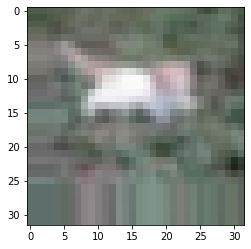

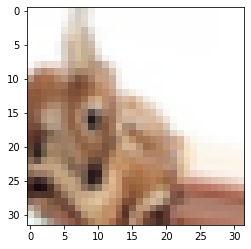

In [7]:
for i in range(3):
  plt.imshow(augmented_x[i])
  plt.show()

In [8]:
#현재 data 개수
data_count = len(train_x)
print("data_count :", data_count)

#원하는 증강 배수
WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

#현재 데이터 개수를 배치 사이즈로 나누면 몇 번 나오는지
STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

#증강 돌리는 횟수
FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)

data_count : 50000
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 391
FETCH_COUNT : 782


In [9]:
augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)
  # print(len(augmented_x_list))
# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

(100000, 32, 32, 3)
(100000, 1)


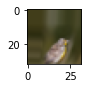

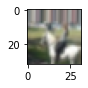

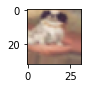

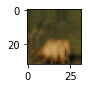

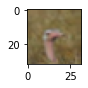

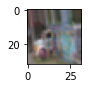

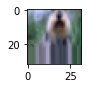

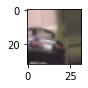

In [10]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()

# 파일 시스템에서 증강

## 데이터 준비

In [11]:
!rm -rf dogs_prepared.tar.gz
!wget https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/dogs_prepared.tar.gz
!ls -al 

--2022-07-06 03:11:24--  https://github.com/dhrim/DMC_2022/raw/master/material/deep_learning/dogs_prepared.tar.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/dogs_prepared.tar.gz [following]
--2022-07-06 03:11:24--  https://raw.githubusercontent.com/dhrim/DMC_2022/master/material/deep_learning/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   175MB/s    in 0.3s    

2022-07-06 03:11:25 (175 MB/s) 

In [12]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

## 데이터 증강

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [14]:
def my_preprocess_input(image):
  return image/255

BATCH_SIZE = 128

data_aug_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=my_preprocess_input
)

파일에서 증강 : **flow_from_directory** 사용

In [15]:
iterator = data_aug_generator.flow_from_directory(
    "dogs_prepared/train",
    target_size=(224,224),
    batch_size=BATCH_SIZE,
    class_mode='sparse'
)

Found 1531 images belonging to 10 classes.


In [16]:
batch_x, batch_y = next(iterator)
print(batch_x.shape, batch_y.shape)

(128, 224, 224, 3) (128,)


In [18]:
data_count = len(iterator.labels)
print("data_count :", data_count)

WANTED_MULTIPLE_COUNT = 2
print("WANTED_MULTIPLE_COUNT :", WANTED_MULTIPLE_COUNT)

STEP_COUNT = int(data_count/BATCH_SIZE)+1
print("STEP_COUNT :", STEP_COUNT)

FETCH_COUNT = STEP_COUNT*WANTED_MULTIPLE_COUNT
print("FETCH_COUNT :", FETCH_COUNT)

augmented_x_list = []
augmented_y_list = []
for i in range(FETCH_COUNT):
  item = next(iterator)
  augmented_x, augmented_y = item
  augmented_x_list.extend(augmented_x)
  augmented_y_list.extend(augmented_y)

# python list를 numpy로 변환
augmented_train_x = np.array(augmented_x_list)
augmented_train_y = np.array(augmented_y_list)

print(augmented_train_x.shape)
print(augmented_train_y.shape)

data_count : 1531
WANTED_MULTIPLE_COUNT : 2
STEP_COUNT : 12
FETCH_COUNT : 24
(3062, 224, 224, 3)
(3062,)


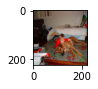

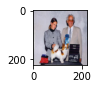

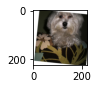

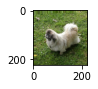

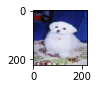

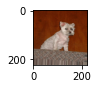

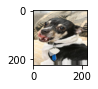

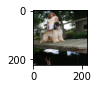

In [19]:
for i in [0,2,4,6,8,10,12,14]:
  plt.figure(figsize=(1,1))
  plt.imshow(augmented_train_x[i])
  plt.show()